In [1]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [2]:
# 准备数据
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

# 生成数据
for i in range(50):
    # 大约5%的年轻人确实经历过副作用
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # 大约5%的老年人没有经历过副作用
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # 大约95%的年轻人没有经历过副作用
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # 大约95%的老年人确实经历过副作用
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)
print(train_samples.shape)

# 通过将每个特征缩放到给定的范围来转换特征。
scaler = MinMaxScaler(feature_range=(0,1))

scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
# 我们只是根据fit_transform（）函数默认情况下不接受一维数据的情况，将数据重塑为2D。
print(train_samples.reshape(-1,1).shape)

(2100,)
(2100, 1)


In [3]:
test_labels =  []

test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, verbose = 2)

Epoch 1/30
189/189 - 5s - loss: 0.6577 - accuracy: 0.5587 - val_loss: 0.6270 - val_accuracy: 0.6381
Epoch 2/30
189/189 - 2s - loss: 0.6311 - accuracy: 0.6085 - val_loss: 0.5951 - val_accuracy: 0.6619
Epoch 3/30
189/189 - 2s - loss: 0.6045 - accuracy: 0.6587 - val_loss: 0.5679 - val_accuracy: 0.7000
Epoch 4/30
189/189 - 2s - loss: 0.5806 - accuracy: 0.6979 - val_loss: 0.5423 - val_accuracy: 0.7429
Epoch 5/30
189/189 - 2s - loss: 0.5573 - accuracy: 0.7402 - val_loss: 0.5179 - val_accuracy: 0.7524
Epoch 6/30
189/189 - 2s - loss: 0.5344 - accuracy: 0.7735 - val_loss: 0.4949 - val_accuracy: 0.7619
Epoch 7/30
189/189 - 2s - loss: 0.5115 - accuracy: 0.7989 - val_loss: 0.4722 - val_accuracy: 0.8238
Epoch 8/30
189/189 - 2s - loss: 0.4890 - accuracy: 0.8233 - val_loss: 0.4497 - val_accuracy: 0.8381
Epoch 9/30
189/189 - 2s - loss: 0.4669 - accuracy: 0.8370 - val_loss: 0.4287 - val_accuracy: 0.8524
Epoch 10/30
189/189 - 2s - loss: 0.4453 - accuracy: 0.8508 - val_loss: 0.4079 - val_accuracy: 0.8857

In [8]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [12]:
rouunded_predictions = np.argmax(predictions,axis=-1)
for i in rouunded_predictions:
  print(i)

1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
1
0
0
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
1
1
1
0
0
0
1
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
0
0
1
0


In [13]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [14]:
def plot_confusion_matrix(cm, classes,
              normalize=False,
              title='Confusion matrix',
              cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


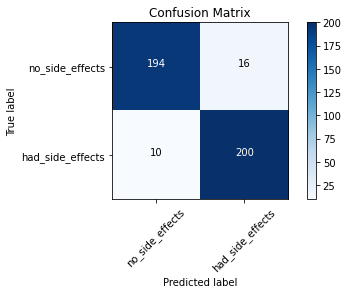

In [15]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')